In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

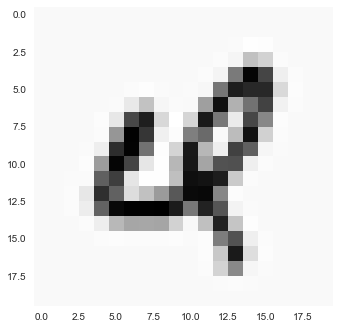

In [21]:
import scipy.io as sio
test = sio.loadmat('test1.mat')
X = test['X']
y = test['y']
plt.imshow(X[1000, :].reshape(20, 20))
plt.grid('off')
plt.show()

In [36]:
def cost_reg(theta, X,Y,lamb):
    posX=X[Y==1,:]
    negX=X[Y==0,:]
    m=len(Y)
    return 1./m*(np.sum(-np.log(sigmoid(posX.dot(theta[:,np.newaxis]))))
                      +sum(-np.log(1-sigmoid(negX.dot(theta[:,np.newaxis])))))
                      +lamb/2/m*np.sum(theta[1:]**2)


def grad_reg(theta, X,Y,lamb):
    m=len(Y)
    grad=1/m*np.dot(X.T,sigmoid(X.dot(theta[:,np.newaxis]))-Y[:,np.newaxis]).ravel()
    grad[1:]=grad[1:]+lamb/m*(theta[1:])
    return grad
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
from scipy.optimize import minimize

In [49]:
X_ = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
K = len(np.unique(y))
all_theta = np.zeros((K, X_.shape[1]))
for i in range(10):
    Y = ((y == i+1)*1).ravel()
    theta = np.zeros((X_.shape[1],))
    result = minimize(cost_reg, theta, args=(X_, Y, .1), method='BFGS',
                      jac=grad_reg,                options={'gtol': 1e-6, 'disp': True})
    all_theta[i, :] = result.x

Optimization terminated successfully.
         Current function value: 0.013115
         Iterations: 418
         Function evaluations: 419
         Gradient evaluations: 419
Optimization terminated successfully.
         Current function value: 0.050802
         Iterations: 609
         Function evaluations: 610
         Gradient evaluations: 610
Optimization terminated successfully.
         Current function value: 0.057602
         Iterations: 607
         Function evaluations: 608
         Gradient evaluations: 608
Optimization terminated successfully.
         Current function value: 0.033065
         Iterations: 533
         Function evaluations: 534
         Gradient evaluations: 534
Optimization terminated successfully.
         Current function value: 0.054456
         Iterations: 615
         Function evaluations: 616
         Gradient evaluations: 616
Optimization terminated successfully.
         Current function value: 0.018256
         Iterations: 500
         Function ev

In [55]:
pred = np.argmax(X_.dot(all_theta.T), 1)+1

In [59]:
acc = np.mean(y.ravel() == pred)
acc

0.96460000000000001

#### NN

In [78]:
weights = sio.loadmat('test2.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
z2 = theta1.dot(X_.T)
a2 = sigmoid(z2)
a2 = np.concatenate((np.ones((1, a2.shape[1])), a2), 0)
z3 = theta2.dot(a2)
a3 = sigmoid(z3)
pred = np.argmax(a3, 0)+1
acc = np.mean(y.ravel() == pred)
acc

0.97519999999999996